# Figurer i Python
Når man skal jobbe med et datasett er å lage figurer et av de viktigste verktøyene man har. Dette gjelder i starten når man prøver å få oversikten over dataene, men også seinere når man skal presentere resultater. 

I denne oppgaven skal vi se på et par forskjellige måter å visualisere data. 

In [2]:
import numpy as np # for regneoperasjoner
import matplotlib.pyplot as plt # for figurer
import matplotlib
import requests # for filinnlasting
import io # for filinnlasting
from EkteDataFunk import loadData # for filinnlasting

Last inn et datasett å jobbe med. I denne oppgaven bruker vi års-temperatur i Bergen fra 1860 til 2020. 

In [17]:
file='TempBergenYearlyNonan.txt'
temp,tid = loadData(file)

#### Linjeplot
Den aller enkleste figuren er et linjeplot. Da er indeks langs x-aksen, og selve verdien langs y-aksen. I dette eksempelet har vi temperatur som en funksjon av tid, så vi får tid langs x-aksen og temperatur langs y-aksen. 

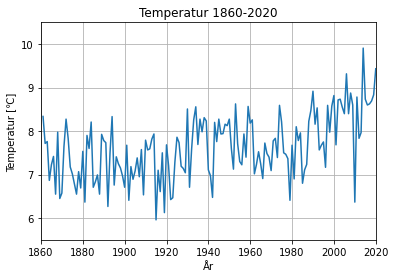

In [18]:
ax=plt.axes() # lag akser å plotte i
# Det som har med selve den plottede linjen å gjøre
ax.plot(
    tid,temp)

# Det som har med grid, tekst etc å gjøre
ax.set(
    title='Temperatur 1860-2020',
    xlabel='År',
    ylabel='Temperatur [\u2103]', # \u2103 er koden for grader celcius. 
    xlim=[1860,2020], # sett grense for x-aksen
    ylim=[5.5,10.5]) # sett grense for y-aksen
ax.grid() # legg til rutenett (grid) i bakgrunnen
plt.show() # denne linjen er kun med så vi slipper unødvendig tekstoutput. Du kan jo kommentere den ut for å se om du vil. 

Men har mye valgfrihet når man skal lage figurer. Alle farger, tekststørrelse, figurstørrelse, akser, grenser, verdier/tekst langs aksene og mye mer kan endres. Det enkleste å gjøre når man skal finne ut hvordan man skal endre på noe er å lese dokumentasjon til funksjoner i `matplotlib`. `matplotlib` er et stort bibliotek for plotting av figurer i python, og det meste du trenger finnes her. Det skal sies at det å lese dokumentasjon er en treningssak. Det kan være overveldende i starten, og vanskelig å finne ut hvor i all informasjonen den informasjonen du er på jakt etter finnes, men dette blir lettere etterhvert.

Si at du vil at linjen heller skal være oransje og at alle faktiske datapunkt skal være markert med en grønn femkant. Da ville jeg googlet f.eks. "matplotlib line color python", trykket meg inn på dokumentasjonslinken som kommer opp. I dette tilfellet kommer jeg til denne nettsiden https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.html. Dette er en under-side i dokumentasjonen til Matplotlib. Ganske tidlig på siden er det noen eksempler på å endre linjefarge og sette markør, men for å finne informasjon om hvordan jeg setter markøren til en famkant og gjøre den grønn må man skrolle lengre ned på siden til man finner "Other Parameters:". Under ** kwargs (keyword arguemts) kommer en lang liste. Kolonnen "Properties" er det vi er ute etter. Detter er alle "keywordene" man kan gi til plt.plot, f.eks "color". Måten man bruker dette er f.eks. `plt.plot(tid,temp), color='green')`. Dette gir en grønn linje istedet for en blå. `color='green'` er et "keyword argument pair". For informasjon om hvert enkelt keyword trykker man på lenken deres og finner hvile mulige input de kan få. 

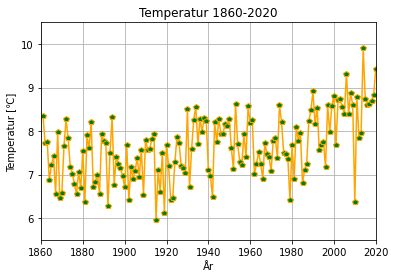

In [19]:
ax=plt.axes()
ax.plot(
    tid,temp,
    color='orange',
    marker='p',
    markerfacecolor='green')
ax.set(
    title='Temperatur 1860-2020',
    xlabel='År',
    ylabel='Temperatur [\u2103]', # \u2103 er koden for grader celcius. 
    xlim=[1860,2020], # sett grense for x-aksen
    ylim=[5.5,10.5]) # sett grense for y-aksen
ax.grid() # legg til rutenett (grid) i bakgrunnen
plt.show() 

#### Oppgave 1: 
Lag samme figur som over, men bruk røde stjerner som markør og ingen linje istedet. 

#### Oppgave 2:
Lag samme figur som over, men lag tittlen større. Dette krever et nytt søk i dokumentasjonen. Tips: inkluder "title" og "fontsize" i søkeordene dine. Plot i nye farger, markører og linjestil. Ha også forskjellig farge på selve markøren og kanten til markøren. 

#### Histogram
En annen måte å presentere data på er med histogram. Her byttes informasjon om endringer med tid ut mot informasjon om hvilke verdier som er vanlige, og hvor sannsynlig det er med ekstreme verdier.

Den enkleste versjonen ser slik som dette ut. 

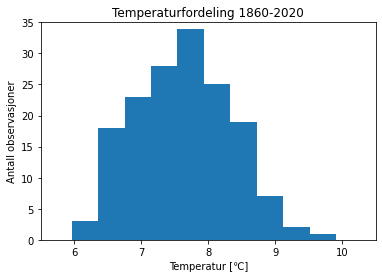

In [20]:
ax=plt.axes()
ax.hist(temp)
ax.set(
    title='Temperaturfordeling 1860-2020',
    ylabel='Antall observasjoner',
    xlabel='Temperatur [\u2103]', # \u2103 er koden for grader celcius. 
    ylim=[0,35], # sett grense for x-aksen
    xlim=[5.5,10.5]) # sett grense for y-aksen
plt.show()

Det er ganske grovt inndelt, og blir "boksete". Dette kan man endre på ved å lage flere intervall enn 10 som er default. Her er det 15 intervall, eller "bins".

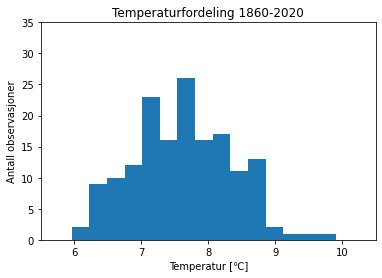

In [21]:
ax=plt.axes()
ax.hist(temp, bins=15)
ax.set(
    title='Temperaturfordeling 1860-2020',
    ylabel='Antall observasjoner',
    xlabel='Temperatur [\u2103]', # \u2103 er koden for grader celcius. 
    ylim=[0,35], # sett grense for x-aksen
    xlim=[5.5,10.5]) # sett grense for y-aksen
plt.show()

Det er fremdeles ganske grovt. Dette har med lengden på tidsserien å gjøre - den er bare 160 steg lang. Hva skjer om vi istedet laster inn datasettet som har månedsverdier? Legg merke til at grensene for aksene er like i denne og forrige figur. Dette kan være nyttig for å se tydelig hvordan antall observasjoner er fordelt mellom temperaturintervallene. Ofte er imidlertid det man er mest interessert i når man ser på histogram den statistiske fordelingen - ikke nøyaktig hvor mange observasjoner det finnes i det ene eller det andre intervallet.  

In [26]:
# Last inn det samme datasettet men med månedsverdier. 
file='TempBergen.txt'
temp,tid = loadData(file)

# For å bruke funksjonen np.reshape og få ett histogram med alle verdiene må de samles i en lang vektor. 
# Plot gjerne temp direkte for å se hvordan np.hist da plotter ett histogram for hver kolonne på samme x-akse. 
temp_vec=np.reshape(temp,(1,12*len(temp))) 
temp_vec=temp_vec[0] # Man må "rydde vekk" en dimensjon etter reshape. 

#### Oppgave 3:
Som nevnt over er histogram en måte å vise statistisk fordeling. Vanlige første ordens statistiske parametre er gjennomsnitt, median og standardavvik. Regn ut disse tre for den nye vektoren `temp_vec`. Bruk funksjonene som finens i numpy.

#### Oppgave 4:
Lag et histogragm av `temp_vec` og prøv deg frem med forskjellige antall bins frem til du finner et antall som du synes passer fint. 
Forklar:
- Hvorfor du valgte dette antallet bins
- Hva figuren viser. Diskuter blant annet hva som kan være grunnen til de to toppene i fordeling, og hvorfor forskjellen mellom å se på månedlige verdier og års-verdier er så stor. 

#### Oppgave 5:
Se tilbake på verdiene av gjennomsnitt, median og standardavvik fra oppgave 3. Diskuter hvorfor du synes disse verdiene beskriver variabiliteten i datasettet godt eller dårlig? Tror du de tilsvarende statistiske parametrene ville vært mer eller mindre beskrivende for de årlige gjennomsnittsverdiene? Ut ifra dette: noter noen tanker om hvorfor det kan være nyttig å studere histogrammet til et datasett du skal begynne å jobbe med, og hvordan histogram og linjeplot (f.esk. en tidsserie) utfyller hverandre. 

### Kontur-plot
Den siste måten å fremstille data på som vi går gjennom i denne oppgaven er "Filled Contour"-plot. Kommendoen for disse er `contourf`. Dette er en god måte å vise to-dimensjonale datasett på hvor man har en variabel som er avhengig av to parametre. Variabsjon i variabelen vises med farger. I dette eksempelet har vi tid langs både x- og y-aksen. Det er ikke det mest typiske, vanligvis har man to ulike parametre her, for eksempel tid og dyp, tid og koordinat, eller lengdegrader og breddegrader. Dette er bare tre eksempler - man kan ha hva som helst langs disse to aksene, så lenge man har en tredje variabel som er avhengig av begge disse to parametrene. Her er temperatur denne variabelen som er avhengig av to ting: hvilken måned man er i, og hvilket år. I figuren er måneder langs x-aksen, år langs y-aksen, og selve temperaturen vises med farger definert med fargeskalaen til høyre: blått er kaldt, lysegrønn er varmt. I slike plot som dette må man *alltid* ha med en fargeskala - hvis ikke gir ikke fargene i selve figuren noen informasjon man kan bruke. 

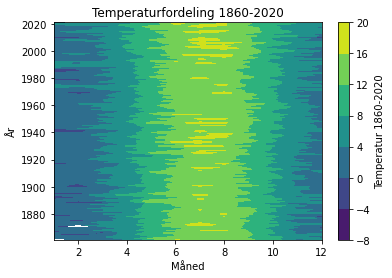

In [39]:
ax=plt.axes()
c=ax.contourf(np.linspace(1,12,12),tid,temp)
cbar=plt.colorbar(c)
cbar.set_label('Temperatur 1860-2020')
ax.set(
    title='Temperaturfordeling 1860-2020',
    ylabel='År',
    xlabel='Måned')
plt.show()

#### Oppgave 6:

Blått og grønt er kanskje ikke de mest intuitive fargene å bruke for å vise temperatur, men dette kan endres med å definere et annet `colormap`. Matplotlib sitt default colormap er det over, og heter "viridis". Klikk deg inn på https://matplotlib.org/stable/tutorials/colors/colormaps.html og finn et fint fargekart. Bytt ut 'X' i koden under med navnet på kartet du har valgt. 

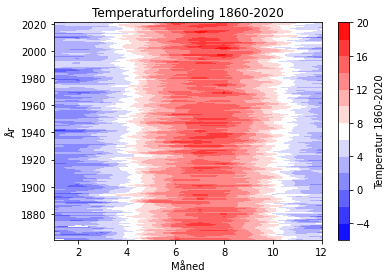

In [59]:
from matplotlib import cm

ax=plt.axes()
cmap=cm.get_cmap('X')
c=ax.contourf(
    np.linspace(1,12,12),tid,temp,
    cmap=cmap, # Her definerer du at fargekartet du har valgt skal brukes i denne figuren
    levels=15) # Angi hvor fin inndeling du vil ha på fargeskalaen
cbar=plt.colorbar(c)
cbar.set_label('Temperatur 1860-2020')
ax.set(
    title='Temperaturfordeling 1860-2020',
    ylabel='År',
    xlabel='Måned')
plt.show()

Å velge eller lage gode fargekart og sette fargeskalaen kan være nokså knotete i python. Det kan være nyttig å angi grenser til fargeskalaen, for eksempel la den gå fra -10 til 20 istedet for -6 til 20 som her, men da er det veldig viktig å være obs på at man gjør samme endringen på selve figuren og fargeskalaen (colorbaren). Dette krever et par work-arounds som vi ikke skal se på nå, men det er greit å være obs på at dette ikke alltid går som man vil automatisk - det trengs ofte veldig sydelig og detaljert definering siden fargeskalaen ikke oppdateres automatisk med nye grenser selv om man setter dette til contourf. 

Man bør også tenke på slike ting som hvilke farger som representerer hvilke verdier. Velger du f.eks. fargekartet "rwb" (red white blue) i oppgaven over uten å endre på "levels" så havner hvit på temperaturer mellom 6 og 8 grader. Intuitivt vil man tro at hvit er på null. Igjen, vi går ikke gjennom hvordan man kan endre dette i denne oppgaven, men slike ting bør tenkes over. 
